In [17]:
from sympy import *
from sympy.abc import x,y,t,r,theta

Sistema en coordenadas polares
dr/dt=r(1-cos^2(theta)-r^2)
dtheta/dt=1/2cos(theta)sin(theta)-1

In [18]:
#puntos criticos
P=r*(1-(cos(theta)*cos(theta))-r**2) 
Q=(1/2)*cos(theta)*sin(theta)-1
#establecer P(x,y)=0 y Q(x,y)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),r,theta))
#matriz Jacobiana
J11=diff(P,r)
J12=diff(P,theta)
J21=diff(Q,r)
J22=diff(Q,theta)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(0.0, -2.35619449019234 - 1.03171853444778*I), (0.0, -2.35619449019234 + 1.03171853444778*I), (0.0, 0.785398163397448 - 1.03171853444778*I), (0.0, 0.785398163397448 + 1.03171853444778*I), (-1.11803398874989 - 0.866025403784439*I, -2.35619449019234 + 1.03171853444778*I), (-1.11803398874989 - 0.866025403784439*I, 0.785398163397448 + 1.03171853444778*I), (-1.11803398874989 + 0.866025403784439*I, -2.35619449019234 - 1.03171853444778*I), (-1.11803398874989 + 0.866025403784439*I, 0.785398163397448 - 1.03171853444778*I), (1.11803398874989 - 0.866025403784439*I, -2.35619449019234 - 1.03171853444778*I), (1.11803398874989 - 0.866025403784439*I, 0.785398163397448 - 1.03171853444778*I), (1.11803398874989 + 0.866025403784439*I, -2.35619449019234 + 1.03171853444778*I), (1.11803398874989 + 0.866025403784439*I, 0.785398163397448 + 1.03171853444778*I)]
⎡     2      2                                    ⎤
⎢- 3⋅r  - cos (θ) + 1       2⋅r⋅sin(θ)⋅cos(θ)     ⎥
⎢                                              

In [21]:
#J en el punto critico
Jc1=J.subs([(r,0),(theta,0)])
pprint(Jc1.eigenvals())
#pprint(Jc1.eigenvects())

{0: 1, 0.5: 1}


In [ ]:
El punto critico (0,0) tiene eigenvalores reales positivos distintos por lo que es un nodo inestable.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

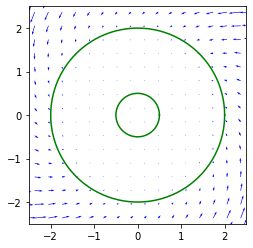

In [2]:
def dF(r, theta):
    return [ r*(1-(np.cos(theta)*np.cos(theta))-r**2) , (1/2)*np.cos(theta)*np.sin(theta)-1 ]

X, Y = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-3, 3, 20))
u, v = np.zeros_like(X), np.zeros_like(X)
NI, NJ = X.shape

for i in range(NI):
    for j in range(NJ):
        x, y = X[i, j], Y[i, j]
        r, theta = (x**2 + y**2)**0.5, np.arctan2(y, x)
        fp = dF(r, theta)
        u[i,j] = (r + fp[0]) * np.cos(theta + fp[1]) - x
        v[i,j] = (r + fp[0]) * np.sin(theta + fp[1]) - y

plt.quiver(X, Y, u, v, color='b')
#plt.streamplot(X, Y, u, v, color='r')
plt.axis('square')
plt.axis([-2.5, 2.5, -2.5, 2.5])
#agregando el circulo
phi = np.linspace(0, 2*np.pi, 200)
r = 0.5
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y, color='g')
r = 2
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y, color='g')
plt.show()

El unico punto critico es el origen, el flujo ingresa al circulo de radio 2, por lo que es invariante positivo. Si se utiliza una region anular donde se excluye el punto critico, y ya que el circulo es un set invariante positivo por el corolario del teorema de Poincare-Bendixson existe un ciclo limite contenido en el cuadrado.